# Data Retrieving - Breast Cancer Dataset
## Dataset from: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as plot

In [2]:
# Functions 
def plot_box_column(dataframe, columns):
    fig = plt.figure(figsize=(40,40))
    for i, heading in enumerate(columns):
        ax = fig.add_subplot(4, 3, i+1)
        dataframe[heading].plot(kind='box')
        ax.set_title(heading)
    plt.show()
    
def show_min_max_values(column_name):
    print('> ' + column_name.name)
    print('Min - Max: ' + str(column_name.min()) + ' - ' + str(column_name.max()))
    
def show_all_min_max_values(dataframe):
    for column in dataframe:
        show_min_max_values(dataframe[column])
    
def check_outside_values(column_name, start_value, end_value):
    count = 0
    for item in column_name:
        if item < start_value or item > end_value:
            count += 1
    show_min_max_values(column_name)
    print(str(count) + " values outside of " + str(start_value) + ' - ' + str(end_value))

In [3]:
# Breast Cancer CSV Path (Local Directory)
breast_cancer_csv = './dataR2.csv'

# Read Breast Cancer CSV file
breast_cancer = pd.read_csv(breast_cancer_csv, sep=',', decimal='.')

In [4]:
breast_cancer.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [5]:
# Check datatypes
breast_cancer.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

In [6]:
# Summary of dataset
breast_cancer.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [7]:
# Check for null
breast_cancer.isnull().any()

Age               False
BMI               False
Glucose           False
Insulin           False
HOMA              False
Leptin            False
Adiponectin       False
Resistin          False
MCP.1             False
Classification    False
dtype: bool

In [8]:
# Check for duplicate entries
breast_cancer.duplicated().any()

False

In [9]:
# Show the range of all attributes before pre-processing
show_all_min_max_values(breast_cancer)

> Age
Min - Max: 24 - 89
> BMI
Min - Max: 18.37 - 38.57875854
> Glucose
Min - Max: 60 - 201
> Insulin
Min - Max: 2.432 - 58.46
> HOMA
Min - Max: 0.46740866700000006 - 25.05034187
> Leptin
Min - Max: 4.311 - 90.28
> Adiponectin
Min - Max: 1.65602 - 38.04
> Resistin
Min - Max: 3.21 - 82.1
> MCP.1
Min - Max: 45.843 - 1698.44
> Classification
Min - Max: 1 - 2


In [10]:
# Check for impossible values

# Age (Longest living person lived to be 122)
check_outside_values(breast_cancer['Age'], 0, 122)

# BMI (Under 18.5 is underweight, over 30 is obese)
check_outside_values(breast_cancer['BMI'], 18.5, 30)

> Age
Min - Max: 24 - 89
0 values outside of 0 - 122
> BMI
Min - Max: 18.37 - 38.57875854
40 values outside of 18.5 - 30


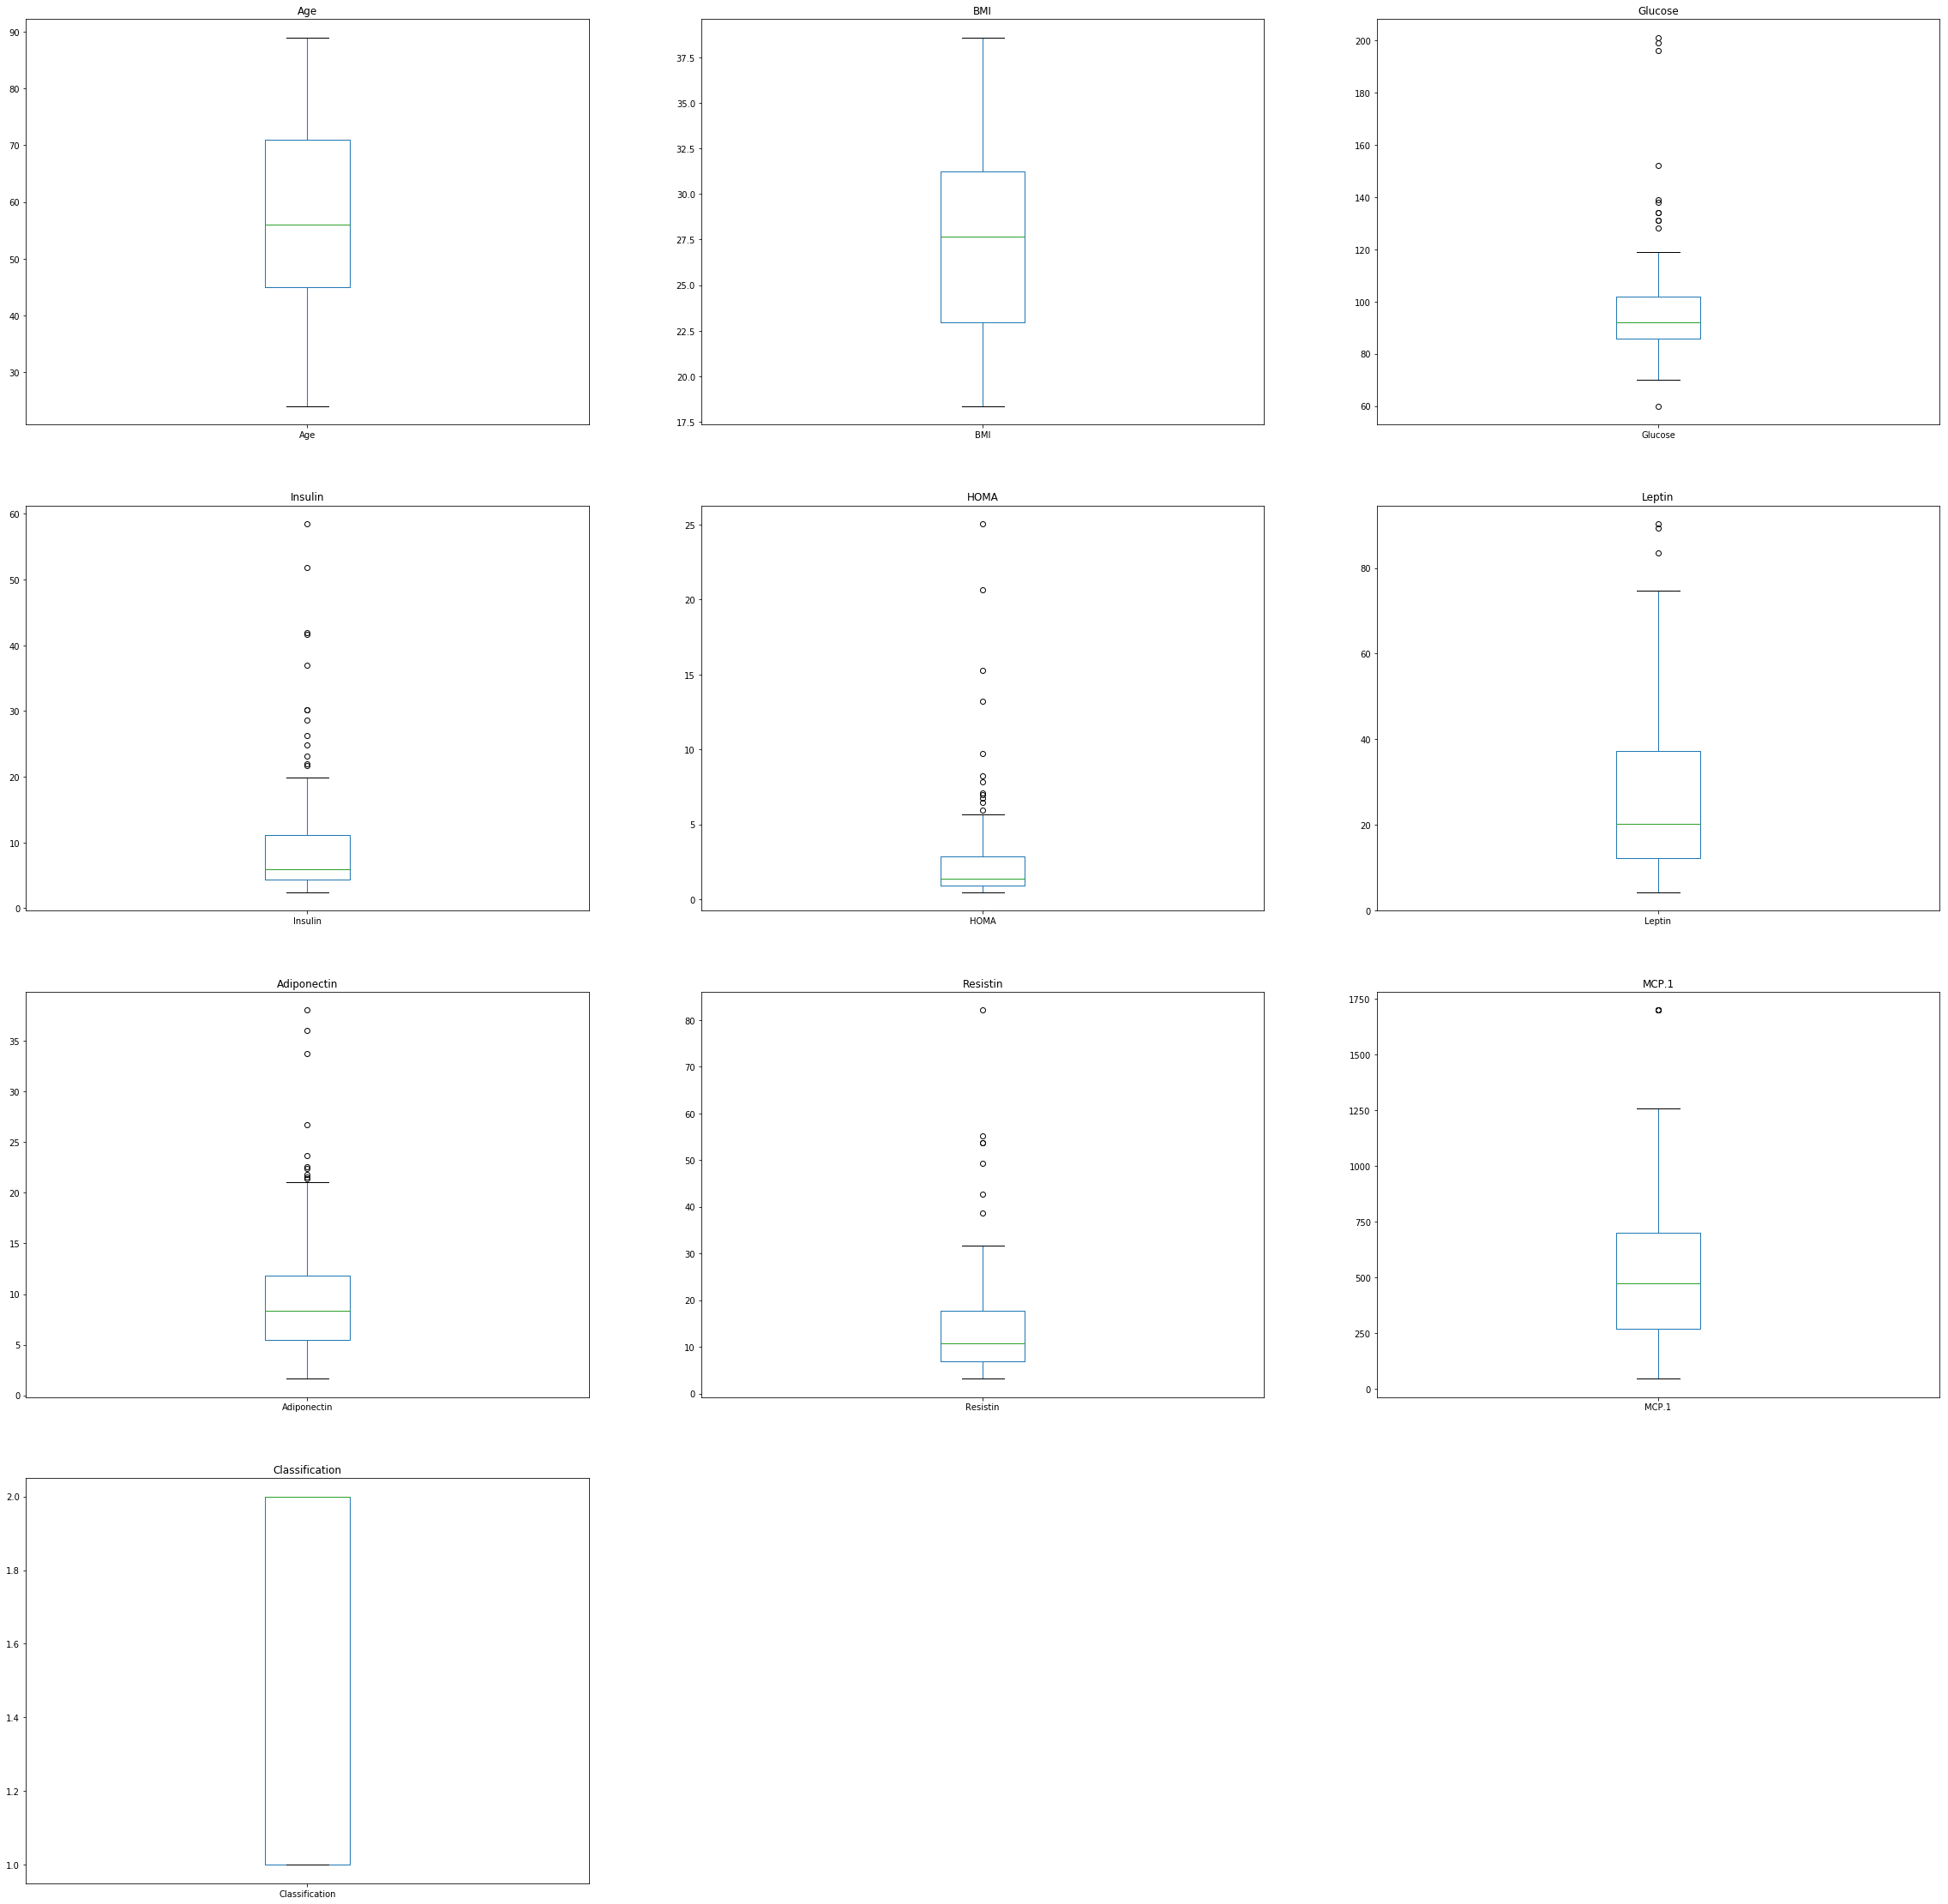

In [11]:
# Check for outliers for every column using boxplot
plot_box_column(breast_cancer, breast_cancer.columns)

In [12]:
# Create new dataframe without outliers
breast_cancer = breast_cancer[(stats.zscore(breast_cancer) < 3).all(axis=1)]

In [13]:
# Show the range of all attributes after pre-processing
show_all_min_max_values(breast_cancer)

> Age
Min - Max: 25 - 89
> BMI
Min - Max: 18.37 - 38.57875854
> Glucose
Min - Max: 60 - 152
> Insulin
Min - Max: 2.432 - 36.94
> HOMA
Min - Max: 0.46740866700000006 - 9.736007333
> Leptin
Min - Max: 4.311 - 74.7069
> Adiponectin
Min - Max: 1.65602 - 26.72
> Resistin
Min - Max: 3.21 - 49.24184
> MCP.1
Min - Max: 45.843 - 1256.083
> Classification
Min - Max: 1 - 2


#  Data Exploration - Breast Cancer Dataset
## Dataset from: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

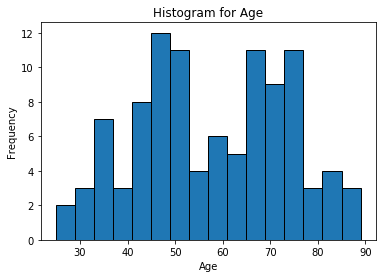

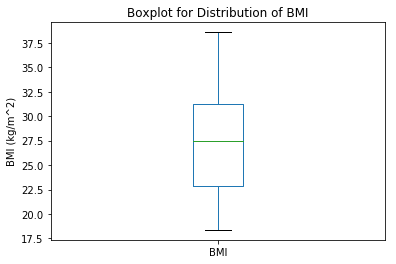

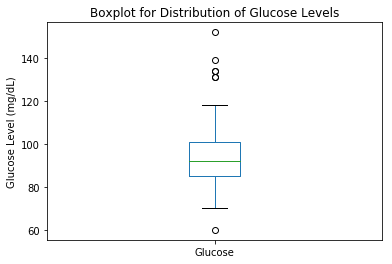

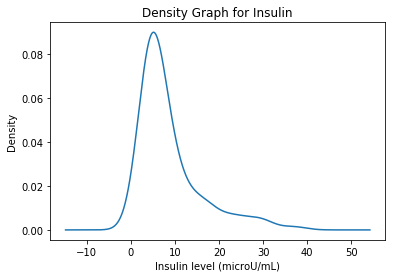

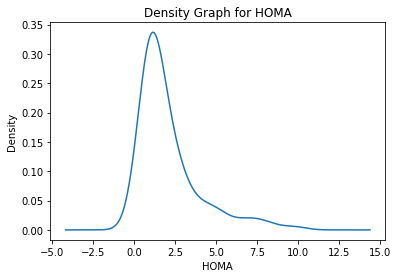

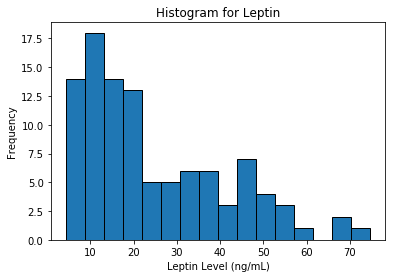

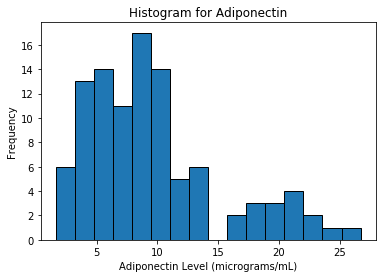

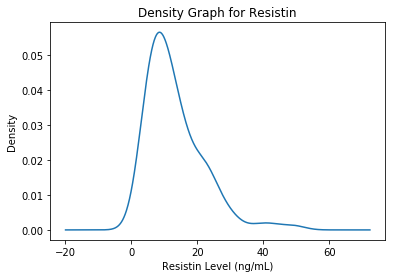

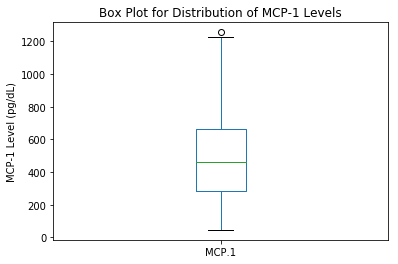

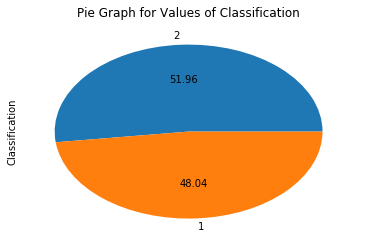

In [14]:
# import matplotlib.pyplot as plt
# import matplotlib as plot

plt.hist(breast_cancer['Age'], edgecolor='black', linewidth=1, bins=16)
plt.title('Histogram for Age')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.show()

breast_cancer['BMI'].plot(kind='box')
plt.title('Boxplot for Distribution of BMI')
plt.ylabel('BMI (kg/m^2)')
plt.show()

breast_cancer['Glucose'].plot(kind='box')
plt.title('Boxplot for Distribution of Glucose Levels')
plt.ylabel('Glucose Level (mg/dL)')
plt.show()

breast_cancer['Insulin'].plot(kind='density')
plt.title('Density Graph for Insulin')
plt.xlabel('Insulin level (microU/mL)')
plt.show()

breast_cancer['HOMA'].plot(kind='density')
plt.title('Density Graph for HOMA')
plt.xlabel('HOMA')
plt.show()

plt.hist(breast_cancer['Leptin'], edgecolor='black', linewidth=1, bins=16)
plt.title('Histogram for Leptin')
plt.ylabel('Frequency')
plt.xlabel('Leptin Level (ng/mL)')
plt.show()

plt.hist(breast_cancer['Adiponectin'], edgecolor='black', linewidth=1, bins=16)
plt.title('Histogram for Adiponectin')
plt.ylabel('Frequency')
plt.xlabel('Adiponectin Level (micrograms/mL)')
plt.show()

breast_cancer['Resistin'].plot(kind='density')
plt.title('Density Graph for Resistin')
plt.xlabel('Resistin Level (ng/mL)')
plt.show()

breast_cancer['MCP.1'].plot(kind='box')
plt.title('Box Plot for Distribution of MCP-1 Levels')
plt.ylabel('MCP-1 Level (pg/dL)')
plt.show()

breast_cancer['Classification'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Pie Graph for Values of Classification')
plt.show()

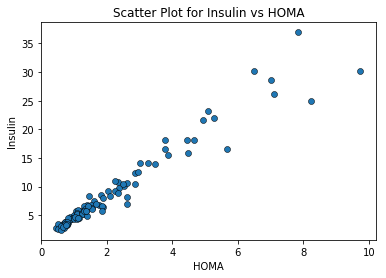

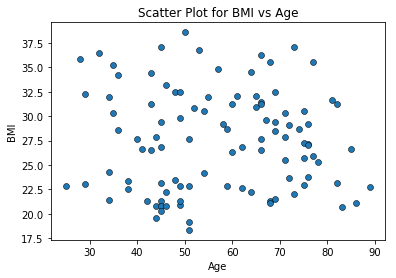

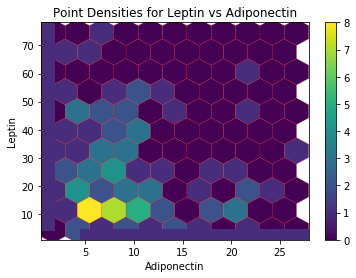

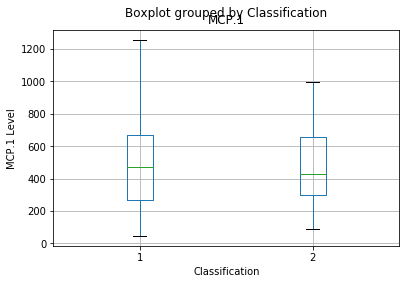

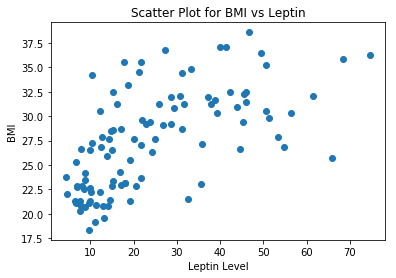

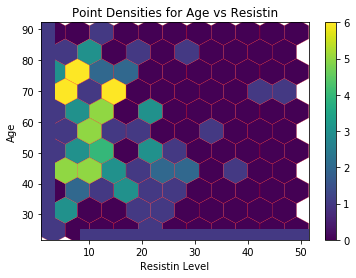

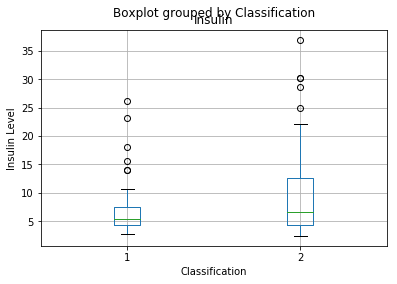

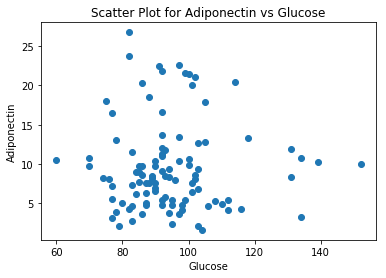

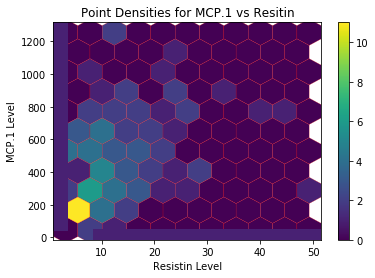

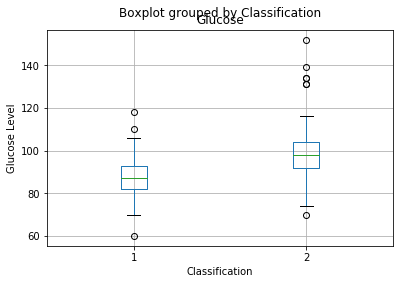

In [15]:
plt.scatter(breast_cancer['HOMA'], breast_cancer['Insulin'], edgecolors='black', linewidths=0.5)
plt.title('Scatter Plot for Insulin vs HOMA')
plt.ylabel('Insulin')
plt.xlabel('HOMA')
plt.show()

plt.scatter(breast_cancer['Age'], breast_cancer['BMI'], edgecolors='black', linewidths=0.5)
plt.title('Scatter Plot for BMI vs Age')
plt.ylabel('BMI')
plt.xlabel('Age')
plt.show()

plt.hexbin(breast_cancer['Adiponectin'], breast_cancer['Leptin'], gridsize = 10, marginals = True, edgecolors = 'red',
          linewidths = 0.2)
plt.title('Point Densities for Leptin vs Adiponectin')
plt.ylabel('Leptin')
plt.xlabel('Adiponectin')
plt.colorbar()
plt.show()

breast_cancer.dropna().boxplot(column='MCP.1', by='Classification')
plt.ylabel('MCP.1 Level')
plt.show()

plt.scatter(breast_cancer['Leptin'], breast_cancer['BMI'])
plt.title('Scatter Plot for BMI vs Leptin')
plt.ylabel('BMI')
plt.xlabel('Leptin Level')
plt.show()

plt.hexbin(breast_cancer['Resistin'], breast_cancer['Age'], gridsize = 10, marginals = True, edgecolors = 'red',
          linewidths = 0.2)
plt.title('Point Densities for Age vs Resistin')
plt.ylabel('Age')
plt.xlabel('Resistin Level')
plt.colorbar()
plt.show()

breast_cancer.dropna().boxplot(column='Insulin', by='Classification')
plt.ylabel('Insulin Level')
plt.show()

plt.scatter(breast_cancer['Glucose'], breast_cancer['Adiponectin'])
plt.title('Scatter Plot for Adiponectin vs Glucose')
plt.ylabel('Adiponectin')
plt.xlabel('Glucose')
plt.show()

plt.hexbin(breast_cancer['Resistin'], breast_cancer['MCP.1'], gridsize = 10, marginals = True, edgecolors = 'red',
          linewidths = 0.2)
plt.title('Point Densities for MCP.1 vs Resitin')
plt.ylabel('MCP.1 Level')
plt.xlabel('Resistin Level')
plt.colorbar()
plt.show()

breast_cancer.dropna().boxplot(column='Glucose', by='Classification')
plt.ylabel('Glucose Level')
plt.show()

# Data Modelling (Classification) - Breast Cancer Dataset
## Dataset from: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

In [16]:
# Classification = 1 donates patients without breast cancer. 
breast_cancer[breast_cancer['Classification'] == 1].describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.0
mean,58.775510,28.504261,88.061224,7.059878,1.579553,25.840008,9.309585,10.442863,508.133816,1.0
std,18.765289,5.248228,10.322726,4.968344,1.247151,17.962668,5.546543,5.693230,295.239661,0.0
min,25.000000,20.690495,60.000000,2.707000,0.467409,4.311000,2.194280,3.291750,45.843000,1.0
25%,43.000000,23.340000,82.000000,4.345000,0.890787,12.331000,5.429285,6.701880,270.142000,1.0
50%,66.000000,27.700000,87.000000,5.430000,1.133929,21.211700,8.125550,9.153900,473.859000,1.0
75%,75.000000,32.270788,93.000000,7.553000,1.840410,35.891000,10.358725,12.766000,667.928000,1.0
max,89.000000,38.578759,118.000000,26.211000,7.111918,74.706900,26.720000,24.603300,1256.083000,1.0


In [17]:
# Classification = 2 donates patients with breast cancer. 
breast_cancer[breast_cancer['Classification'] == 2].describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.0
mean,55.792453,26.602509,100.264151,10.168000,2.570616,23.726353,9.890944,15.966703,481.797226,2.0
std,12.240159,4.804887,16.357956,8.296139,2.192833,15.151024,5.712961,9.972972,232.463475,0.0
min,34.000000,18.370000,70.000000,2.432000,0.507936,6.333900,1.656020,3.210000,90.600000,2.0
25%,45.000000,22.222222,92.000000,4.420000,1.046286,11.240600,5.478170,8.890000,301.210000,2.0
50%,52.000000,26.840000,98.000000,6.683000,1.658774,17.997300,8.574655,13.912450,426.175000,2.0
75%,66.000000,30.801249,104.000000,12.548000,2.940415,33.161200,12.100000,20.768010,656.393000,2.0
max,82.000000,37.109375,152.000000,36.940000,9.736007,61.480000,22.540000,49.241840,994.316000,2.0


# K-Nearest Neighbours (KNN) Classifier

In [18]:
# Packages KNN & Training
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Packages for Predictions, Evaluation & Validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import KFold

# Packages for KNN Parameter Tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Package for Pre-processing 
from sklearn.preprocessing import StandardScaler

# Package for Time
from time import time

In [19]:
# Functions

# Plot Classification Error rate and K-values
def plot_classification_vs_k(neighbours, classification_error_rate):
    plt.plot(neighbours, classification_error_rate)
    plt.xlabel('K-Value')
    plt.ylabel('Classification Error')
    plt.show()

# Find the Optimal K-value for KNN
def find_optimal_k(X_train, y_train, rangeList=None):
    
    errorList = []
    if rangeList == None: rangeList = list(range(1, 30)) 
    neighbours = filter(lambda x: x % 2 != 0, rangeList)
    
    # Perform 10-folds (cv=10) and get cross-validation score for each k-value
    for k in neighbours:  
        classifier = KNeighborsClassifier(n_neighbors = k)
        c_scores = cross_val_score(classifier, X_train, y_train, cv=10)
        errorList.append(c_scores.mean())
    
    # Calculate classification error & determine the best k-value
    classification_error_rate = [1 - error for error in errorList]
    optimal_k = neighbours[classification_error_rate.index(min(classification_error_rate))]
    return neighbours, classification_error_rate, optimal_k

def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    return predictions, accuracy

In [20]:
# Breast Cancer Feature Data
X = breast_cancer.iloc[:, 0:8].values  

# Breast Cancer Target
y = breast_cancer.iloc[:, 9].values

### KNN - (1/3) 50% for training and 50% for testing;

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)  

In [22]:
# Scale features for consistency
feature_scaler = StandardScaler()  
X_train = feature_scaler.fit_transform(X_train)  
X_test = feature_scaler.transform(X_test)  

In [23]:
X_train

array([[-7.62737894e-01, -1.30549814e+00, -1.37428959e+00,
        -5.15772770e-01, -6.03470786e-01, -1.15538049e+00,
        -1.90996614e-01,  1.79231583e+00],
       [ 6.53019965e-01,  7.08304015e-01, -7.94444551e-01,
        -5.64078203e-01, -5.96874796e-01, -5.69803363e-01,
        -9.07504615e-01, -1.12566711e+00],
       [-1.55984526e-01,  5.62146909e-01, -2.14599512e-01,
        -3.91249266e-01, -4.07019679e-01, -8.38938806e-01,
         7.86165243e-02, -3.11711857e-01],
       [ 1.32719037e+00, -9.24093727e-02,  1.23501308e+00,
         2.24375475e+00,  2.50498429e+00, -1.85955132e-01,
        -7.86857033e-01, -5.12102298e-01],
       [-7.62737894e-01,  1.82988176e+00, -7.21963921e-01,
        -2.35371840e-01, -3.30400206e-01,  1.07219448e+00,
        -8.44337567e-01, -4.87271688e-01],
       [-2.11107871e+00, -9.12743092e-01, -7.94444551e-01,
        -5.75676605e-01, -6.05986103e-01, -2.77747481e-01,
         2.59407701e+00, -9.07678340e-01],
       [ 5.85602924e-01,  6.458090

In [24]:
X_train.shape

(51L, 8L)

In [25]:
y_train

array([2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 2, 2], dtype=int64)

In [26]:
X_test

array([[ 7.87854047e-01, -1.25658417e+00,  6.55168046e-01,
        -3.06746622e-01, -2.43316527e-01, -1.02083696e+00,
        -1.30134129e-01,  1.06922107e-01],
       [ 3.83351801e-01, -1.42712855e-01,  5.10206786e-01,
        -5.19596419e-01, -4.62368853e-01, -8.30713437e-01,
         2.18802633e+00, -6.50561874e-01],
       [ 1.25977333e+00, -3.63274280e-01,  7.53230075e-02,
        -6.72587365e-02, -8.82142934e-02,  2.86558750e+00,
        -1.00240949e+00, -9.83533595e-01],
       [ 5.18185883e-01,  1.34505575e+00,  1.47803637e-01,
        -5.32724281e-01, -5.01972879e-01, -2.25098210e-01,
        -6.91753648e-01, -7.23465007e-01],
       [-1.09982310e+00,  1.13037207e-02,  7.27648676e-01,
        -7.86996943e-01, -7.09631798e-01, -7.01291755e-01,
        -4.53311667e-01,  1.55422362e+00],
       [-3.58235649e-01, -1.78144554e+00,  8.72609936e-01,
        -3.28413967e-01, -2.42400757e-01, -1.02632514e+00,
         6.25182392e-01, -1.13530897e+00],
       [-1.23465718e+00, -8.198751

In [27]:
y_train.shape

(51L,)

In [28]:
y_test

array([2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 2, 1], dtype=int64)

In [29]:
y_test.shape

(51L,)

Optimal K-value is:  7


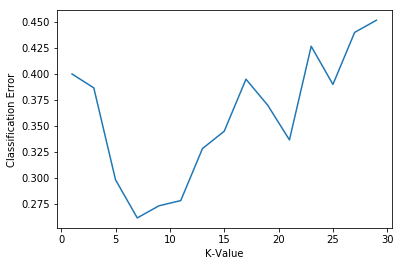

In [30]:
k_value_list = list(range(30))
neighbours, classification_error, optimal_k = find_optimal_k(X_train, y_train, k_value_list)

print "Optimal K-value is: ", optimal_k
plot_classification_vs_k(neighbours, classification_error)

In [31]:
classifier = KNeighborsClassifier()

In [32]:
# Create a parameters for RandomizedSearchCV
param_dist = {'weights': ['uniform', 'distance'],
              'n_neighbors': range(1, 15),
              'p': range(1, 20)}

In [33]:
# Use a RandomizedSearchCV to estimate optimal parameters
random_search = RandomizedSearchCV(
    estimator=classifier, param_distributions=param_dist, n_iter=45, cv=10, verbose=1)

In [34]:
# Fitting Breast Cancer Data to RandomizedSearchCV
start = time()
random_search.fit(X_train, y_train)
total_time_random = time() - start

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.4s finished
C:\Users\brandon\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [35]:
best_random_params = random_search.best_params_
print "Random Search Score: {:.3f}".format(random_search.best_score_)
print "Elaspsed Time: {:.3F} seconds".format(total_time_random)
print "Best Parameters for KNN: \n", best_random_params

Random Search Score: 0.725
Elaspsed Time: 1.509 seconds
Best Parameters for KNN: 
{'p': 8, 'weights': 'uniform', 'n_neighbors': 10}


In [36]:
classifier = KNeighborsClassifier(**best_random_params)
fit = classifier.fit(X_train, y_train)

In [37]:
y_pre, accuracy = evaluate(classifier, X_test, y_test)
y_pre

array([1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 1], dtype=int64)

In [38]:
y_pre.shape

(51L,)

In [39]:
print confusion_matrix(y_test, y_pre)

[[21  3]
 [13 14]]


In [40]:
print classification_report(y_test, y_pre)

              precision    recall  f1-score   support

           1       0.62      0.88      0.72        24
           2       0.82      0.52      0.64        27

   micro avg       0.69      0.69      0.69        51
   macro avg       0.72      0.70      0.68        51
weighted avg       0.73      0.69      0.68        51



In [41]:
print "[Train/test split] score: {:.5f}".format(accuracy)

[Train/test split] score: 0.68627


In [42]:
kf = KFold(n_splits = 10, random_state=4)

In [43]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

('TRAIN:', array([ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101],
      dtype=int64), 'TEST:', array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64))
('TRAIN:', array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  

In [44]:
for k, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classifier.fit(X_train, y_train)
    print "[fold {0}] score: {1:.5f}".format(k, classifier.score(X_test, y_test))

[fold 0] score: 0.72727
[fold 1] score: 0.45455
[fold 2] score: 0.30000
[fold 3] score: 0.90000
[fold 4] score: 0.60000
[fold 5] score: 0.60000
[fold 6] score: 0.70000
[fold 7] score: 0.50000
[fold 8] score: 0.50000
[fold 9] score: 0.40000


In [45]:
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 8
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

In [46]:
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.4, random_state=0)
    clf = KNeighborsClassifier(1, weights='distance', p=1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print "Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score)


Score with 1 selected features: 0.5121951219512195
Score with 2 selected features: 0.6341463414634146
Score with 3 selected features: 0.7804878048780488
Score with 4 selected features: 0.7804878048780488


In [47]:
print "There are " + str(len(new_Ind)) + " features selected:"

There are 4 features selected:


In [48]:
print new_Ind

[7, 2, 1, 0]



## KNN - (2/3) 60% for training and 40% for testing;

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)  

In [50]:
# Scale features for consistency
feature_scaler = StandardScaler()  
X_train = feature_scaler.fit_transform(X_train)  
X_test = feature_scaler.transform(X_test)  

Optimal K-value is:  11


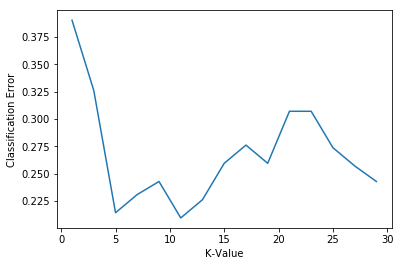

In [51]:
k_value_list = list(range(30))
neighbours, classification_error, optimal_k = find_optimal_k(X_train, y_train, k_value_list)

print "Optimal K-value is: ", optimal_k
plot_classification_vs_k(neighbours, classification_error)

In [52]:
classifier = KNeighborsClassifier()

In [53]:
# Create a parameters for RandomizedSearchCV
param_dist = {'weights': ['uniform', 'distance'],
              'n_neighbors': range(1, 15),
              'p': range(1, 20)}

In [54]:
# Use a RandomizedSearchCV to estimate optimal parameters
random_search = RandomizedSearchCV(
    estimator=classifier, param_distributions=param_dist, n_iter=45, cv=10, verbose=1)

In [55]:
# Fitting Breast Cancer Data to RandomizedSearchCV
start = time()
random_search.fit(X_train, y_train)
total_time_random = time() - start

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.5s finished
C:\Users\brandon\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [56]:
best_random_params = random_search.best_params_
print "Random Search Score: {:.3f}".format(random_search.best_score_)
print "Elaspsed Time: {:.3F} seconds".format(total_time_random)
print "Best Parameters for KNN: \n", best_random_params

Random Search Score: 0.820
Elaspsed Time: 1.656 seconds
Best Parameters for KNN: 
{'p': 6, 'weights': 'distance', 'n_neighbors': 10}


In [57]:
classifier = KNeighborsClassifier(**best_random_params)
fit = classifier.fit(X_train, y_train)

In [58]:
y_pre, accuracy = evaluate(classifier, X_test, y_test)

In [59]:
print confusion_matrix(y_test, y_pre)
print classification_report(y_test, y_pre)

[[14  5]
 [ 5 17]]
              precision    recall  f1-score   support

           1       0.74      0.74      0.74        19
           2       0.77      0.77      0.77        22

   micro avg       0.76      0.76      0.76        41
   macro avg       0.75      0.75      0.75        41
weighted avg       0.76      0.76      0.76        41



In [60]:
print "[Train/test split] score: {:.5f}".format(accuracy)

[Train/test split] score: 0.75610


In [61]:
kf = KFold(n_splits = 5, random_state=4)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

('TRAIN:', array([ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101], dtype=int64), 'TEST:', array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=int64))
('TRAIN:', array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89, 

In [62]:
for k, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classifier.fit(X_train, y_train)
    print "[fold {0}] score: {1:.5f}".format(k, classifier.score(X_test, y_test))

[fold 0] score: 0.42857
[fold 1] score: 0.38095
[fold 2] score: 0.70000
[fold 3] score: 0.70000
[fold 4] score: 0.50000


## KNN - (3/3) 80% for training and 20% for testing;

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

In [64]:
feature_scaler = StandardScaler()  
X_train = feature_scaler.fit_transform(X_train)  
X_test = feature_scaler.transform(X_test)  

Optimal K-value is:  9


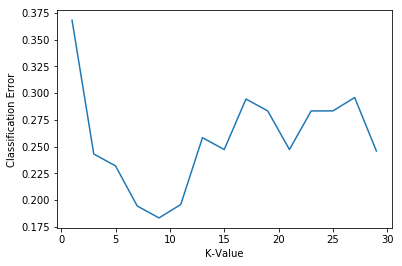

In [65]:
k_value_list = list(range(30))
neighbours, classification_error, optimal_k = find_optimal_k(X_train, y_train, k_value_list)

print "Optimal K-value is: ", optimal_k
plot_classification_vs_k(neighbours, classification_error)

In [66]:
classifier = KNeighborsClassifier()

# Create a parameters for RandomizedSearchCV
param_dist = {'weights': ['uniform', 'distance'],
              'n_neighbors': range(1, 15),
              'p': range(1, 20)}

# Use a RandomizedSearchCV to estimate optimal parameters
random_search = RandomizedSearchCV(
    estimator=classifier, param_distributions=param_dist, n_iter=45, cv=10, verbose=1)

# Fitting Breast Cancer Data to RandomizedSearchCV
start = time()
random_search.fit(X_train, y_train)
total_time_random = time() - start

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    2.0s finished
C:\Users\brandon\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [67]:
best_random_params = random_search.best_params_
print "Random Search Score: {:.3f}".format(random_search.best_score_)
print "Elaspsed Time: {:.3F} seconds".format(total_time_random)
print "Best Parameters for KNN: \n", best_random_params

Random Search Score: 0.790
Elaspsed Time: 2.111 seconds
Best Parameters for KNN: 
{'p': 13, 'weights': 'distance', 'n_neighbors': 11}


In [68]:
classifier = KNeighborsClassifier(**best_random_params)
fit = classifier.fit(X_train, y_train)

In [69]:
y_pre, accuracy = evaluate(classifier, X_test, y_test)

In [70]:
print confusion_matrix(y_test, y_pre)
print classification_report(y_test, y_pre)

[[8 1]
 [6 6]]
              precision    recall  f1-score   support

           1       0.57      0.89      0.70         9
           2       0.86      0.50      0.63        12

   micro avg       0.67      0.67      0.67        21
   macro avg       0.71      0.69      0.66        21
weighted avg       0.73      0.67      0.66        21



In [71]:
print "[Train/test split] score: {:.5f}".format(accuracy)

[Train/test split] score: 0.66667


In [72]:
kf = KFold(n_splits = 5, random_state=4)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

('TRAIN:', array([ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101], dtype=int64), 'TEST:', array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=int64))
('TRAIN:', array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89, 

In [73]:
for k, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classifier.fit(X_train, y_train)
    print "[fold {0}] score: {1:.5f}".format(k, classifier.score(X_test, y_test))

[fold 0] score: 0.38095
[fold 1] score: 0.38095
[fold 2] score: 0.70000
[fold 3] score: 0.70000
[fold 4] score: 0.40000


## Decision Tree (DT) Classifier

In [74]:
# Packages for Decision Tree & Training
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split

# Packages for Predictions, Evaluation & Validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Packages for Decision Tree Parameter Tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [75]:
# Breast Cancer Feature Data
X = breast_cancer.iloc[:, 0:8].values  

# Breast Cancer Target
y = breast_cancer.iloc[:, 9].values

In [76]:
X

array([[ 48.        ,  23.5       ,  70.        ,   2.707     ,
          0.46740867,   8.8071    ,   9.7024    ,   7.99585   ],
       [ 83.        ,  20.69049454,  92.        ,   3.115     ,
          0.70689733,   8.8438    ,   5.429285  ,   4.06405   ],
       [ 82.        ,  23.12467037,  91.        ,   4.498     ,
          1.00965107,  17.9393    ,  22.43204   ,   9.27715   ],
       [ 68.        ,  21.36752137,  77.        ,   3.226     ,
          0.61272493,   9.8827    ,   7.16956   ,  12.766     ],
       [ 86.        ,  21.11111111,  92.        ,   3.549     ,
          0.8053864 ,   6.6994    ,   4.81924   ,  10.57635   ],
       [ 49.        ,  22.85445769,  92.        ,   3.226     ,
          0.73208693,   6.8317    ,  13.67975   ,  10.3176    ],
       [ 89.        ,  22.7       ,  77.        ,   4.69      ,
          0.89078733,   6.964     ,   5.589865  ,  12.9361    ],
       [ 76.        ,  23.8       , 118.        ,   6.47      ,
          1.88320133,   4.311    

In [77]:
X.shape

(102L, 8L)

In [78]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [79]:
y.shape

(102L,)

## DT - (1/3) 50% for training and 50% for testing;

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50) 

In [81]:
# Scale features for consistency
feature_scaler = StandardScaler()  
X_train = feature_scaler.fit_transform(X_train)  
X_test = feature_scaler.transform(X_test)  

In [82]:
X_train

array([[-0.55800612,  0.76084574, -0.56340488,  2.94407694,  2.13644728,
         0.13776416, -0.63255576,  1.35457639],
       [-1.06961623, -1.2635049 , -0.6240244 , -0.22959509, -0.34374101,
        -0.70880681,  1.84512041, -0.69896605],
       [ 0.78497041, -1.01351659,  0.04279024, -0.81827701, -0.74925443,
        -1.24516524,  0.08866139, -0.86659791],
       [-1.00566497, -1.36430663, -0.26030732, -0.8056714 , -0.75986523,
        -1.06786588,  1.20152052, -0.67423338],
       [ 1.04077547,  1.72585717, -1.23021953, -0.74390392, -0.78682941,
        -0.27970334, -0.30511153,  0.49086086],
       [ 1.36053178,  0.84475978,  0.22464878,  1.24442073,  1.10826037,
         0.26998041,  0.01194517,  0.82294271],
       [ 1.29658052,  0.93001514,  0.22464878,  0.06677677,  0.05494832,
         0.66925521,  0.13764551,  2.01152433],
       [ 0.52916536, -1.1115244 ,  0.95208294, -0.35144931, -0.21865726,
         0.32209416, -1.00822677,  0.2976072 ],
       [-1.45332381, -0.74336793

In [83]:
X_train.shape

(51L, 8L)

In [84]:
y_train

array([2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1,
       1, 2, 1, 2, 1, 2, 1], dtype=int64)

In [85]:
y_train.shape

(51L,)

In [86]:
X_test

array([[ 3.37311567e-01, -9.37007303e-02, -4.42165859e-01,
        -3.73719216e-01, -4.28943842e-01, -6.63177315e-01,
        -2.51435302e-01,  2.01206670e-01],
       [-1.32542129e+00,  1.22731572e-01,  4.06507322e-01,
        -9.46854215e-01, -8.42526670e-01, -6.95849461e-01,
        -5.41688269e-01,  1.57317486e+00],
       [ 2.09409040e-01,  1.51251907e+00, -7.84487815e-02,
        -6.67429894e-01, -6.29472759e-01, -3.11739887e-01,
        -7.74662610e-01, -8.14977114e-01],
       [-7.49859914e-01,  1.09564110e+00,  2.28571222e+00,
         2.19824510e+00,  3.02140730e+00,  8.69123996e-01,
         1.65402300e-01, -9.30463843e-01],
       [ 5.29165357e-01,  2.85705809e-01,  7.09604887e-01,
        -5.38168853e-02,  3.53603218e-02, -6.72092462e-01,
        -8.05448726e-01,  3.94846162e-01],
       [ 6.57067884e-01,  1.79072566e-01,  4.67126835e-01,
         1.26164839e+00,  1.21486938e+00,  1.48846186e+00,
        -1.44587557e+00,  4.44565681e+00],
       [-9.41713705e-01,  1.240410

In [87]:
X_test.shape

(51L, 8L)

In [88]:
y_test

array([2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1], dtype=int64)

In [89]:
y_test.shape

(51L,)

In [90]:
classifier = DecisionTreeClassifier()
fit = classifier.fit(X_train, y_train)

In [91]:
y_pre = fit.predict(X_test)
y_pre

array([1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 1], dtype=int64)

In [92]:
y_pre.shape

(51L,)

In [93]:
print confusion_matrix(y_test, y_pre)
print classification_report(y_test,y_pre)

[[18  5]
 [ 9 19]]
              precision    recall  f1-score   support

           1       0.67      0.78      0.72        23
           2       0.79      0.68      0.73        28

   micro avg       0.73      0.73      0.73        51
   macro avg       0.73      0.73      0.73        51
weighted avg       0.74      0.73      0.73        51



In [94]:
# Get baseline accuracy reading to compare against
baseline_accuracy = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)  

In [95]:
# Create a parameters for RandomizedSearchCV
param_dist = {'criterion': ['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': range(1, 41, 5),
              'min_samples_split': range(2, 102, 10),
              'min_samples_leaf': range(1, 21, 5)}

In [96]:
# Use a RandomizedSearchCV to estimate optimal parameters
random_search = RandomizedSearchCV(
    estimator=classifier, param_distributions=param_dist, n_iter=45, cv=10, verbose=1)

# Fitting Breast Cancer Data to RandomizedSearchCV
start = time()
random_search.fit(X_train, y_train)
total_time_random = time() - start

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.6s finished
C:\Users\brandon\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [97]:
# Get the best random score based on the fitted data
best_random_score = random_search.best_score_

In [98]:
# Determine the difference between the randomisedSearch score and baseline score
random_improvement_score = (best_random_score - baseline_accuracy.mean())*100

In [99]:
# Use GridSearchCV to estimate optimal parameters - as an alternative to RandomizedSearchCV to 
# determine which produces better results.
param_grid = {'criterion': ['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': range(1, 41, 5),
              'min_samples_split': range(2, 102, 10),
              'min_samples_leaf': range(1, 21, 5)}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, cv = 10, verbose = 1)

# Fit the grid search to the data
start = time()
grid_search.fit(X_train, y_train)
total_time_grid = time() - start

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 1920 candidates, totalling 19200 fits


[Parallel(n_jobs=1)]: Done 19200 out of 19200 | elapsed:   28.1s finished
C:\Users\brandon\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [100]:
# Get the best grid score based on the fitted data
best_grid_score = grid_search.best_score_

In [101]:
# Determine the difference between the GridSearch score and baseline score
grid_improvement_score = (best_grid_score - baseline_accuracy.mean())*100

In [102]:
best_random_param = random_search.best_params_
best_grid_param = grid_search.best_params_

print "RandomisedSearchCV \nTotal Time: {:.3f}s".format(total_time_random)
print "{:0.3f}% more accurate than baseline".format(random_improvement_score)
print "Best Parameters: \n", best_random_param
print
print "GridSearchCV \nTotal Time: {:.3f}s".format(total_time_grid)
print "{:0.3f}% more accurate than baseline".format(grid_improvement_score)
print "Best Parameters: \n", best_grid_param

RandomisedSearchCV 
Total Time: 0.728s
-1.912% more accurate than baseline
Best Parameters: 
{'min_samples_split': 42, 'max_features': 'auto', 'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6}

GridSearchCV 
Total Time: 28.348s
7.892% more accurate than baseline
Best Parameters: 
{'max_features': 'log2', 'min_samples_split': 22, 'criterion': 'entropy', 'max_depth': 31, 'min_samples_leaf': 1}


In [103]:
# Using Parameters from GridSearch due to better accuracy
classifier = DecisionTreeClassifier(**best_grid_param)
fit = classifier.fit(X_train, y_train)
y_pre = fit.predict(X_test)

In [104]:
print confusion_matrix(y_test, y_pre)
print classification_report(y_test, y_pre)

[[17  6]
 [11 17]]
              precision    recall  f1-score   support

           1       0.61      0.74      0.67        23
           2       0.74      0.61      0.67        28

   micro avg       0.67      0.67      0.67        51
   macro avg       0.67      0.67      0.67        51
weighted avg       0.68      0.67      0.67        51



## DT - (2/3) 60% for training and 40% for testing;

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40) 

In [106]:
# Scale features for consistency
feature_scaler = StandardScaler()  
X_train = feature_scaler.fit_transform(X_train)  
X_test = feature_scaler.transform(X_test)  

In [107]:
classifier = DecisionTreeClassifier()
fit = classifier.fit(X_train, y_train)
y_pre = fit.predict(X_test)

In [108]:
print confusion_matrix(y_test, y_pre)
print classification_report(y_test,y_pre)

[[13  4]
 [ 8 16]]
              precision    recall  f1-score   support

           1       0.62      0.76      0.68        17
           2       0.80      0.67      0.73        24

   micro avg       0.71      0.71      0.71        41
   macro avg       0.71      0.72      0.71        41
weighted avg       0.72      0.71      0.71        41



In [109]:
# Get baseline accuracy reading to compare against
baseline_accuracy = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)  

# Use GridSearchCV to estimate optimal parameters
param_grid = {'criterion': ['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': range(1, 41, 5),
              'min_samples_split': range(2, 102, 10),
              'min_samples_leaf': range(1, 21, 5)}

# Create a parameters for RandomizedSearchCV
param_dist = {'criterion': ['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': range(1, 41, 5),
              'min_samples_split': range(2, 102, 10),
              'min_samples_leaf': range(1, 21, 5)}

# Use a RandomizedSearchCV to estimate optimal parameters
random_search = RandomizedSearchCV(
    estimator=classifier, param_distributions=param_dist, n_iter=45, cv=10, verbose=1)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, cv = 10, verbose = 1)


start = time()
# RandomisedSearch - Fitting Data
random_search.fit(X_train, y_train)
total_time_random = time() - start

# GridSearch - Fitting Data
grid_search.fit(X_train, y_train)
total_time_grid = time() - start

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.6s finished
C:\Users\brandon\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 1920 candidates, totalling 19200 fits


[Parallel(n_jobs=1)]: Done 19200 out of 19200 | elapsed:   27.9s finished
C:\Users\brandon\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [110]:
# GridSearch
best_grid_score = grid_search.best_score_
grid_improvement_score = (best_grid_score - baseline_accuracy.mean())*100
best_grid_param = grid_search.best_params_

# RandomisedSearch
best_random_score = random_search.best_score_
random_improvement_score = (best_random_score - baseline_accuracy.mean())*100
best_random_param = random_search.best_params_

print "RandomisedSearchCV \nTotal Time: {:.3f}s".format(total_time_random)
print "{:0.3f}% more accurate than baseline".format(random_improvement_score)
print "Best Parameters: \n", best_random_param
print
print "GridSearchCV \nTotal Time: {:.3f}s".format(total_time_grid)
print "{:0.3f}% more accurate than baseline".format(grid_improvement_score)
print "Best Parameters: \n", best_grid_param

RandomisedSearchCV 
Total Time: 0.683s
7.845% more accurate than baseline
Best Parameters: 
{'min_samples_split': 2, 'max_features': 'log2', 'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 11}

GridSearchCV 
Total Time: 28.732s
12.763% more accurate than baseline
Best Parameters: 
{'max_features': 'auto', 'min_samples_split': 42, 'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1}


In [111]:
# Using Parameters from GridSearch due to better accuracy
classifier = DecisionTreeClassifier(**best_grid_param)
fit = classifier.fit(X_train, y_train)
y_pre = fit.predict(X_test)

In [112]:
print confusion_matrix(y_test, y_pre)
print classification_report(y_test, y_pre)

[[13  4]
 [ 6 18]]
              precision    recall  f1-score   support

           1       0.68      0.76      0.72        17
           2       0.82      0.75      0.78        24

   micro avg       0.76      0.76      0.76        41
   macro avg       0.75      0.76      0.75        41
weighted avg       0.76      0.76      0.76        41



## DT - (3/3) 80% for training and 20% for testing;

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [114]:
# Scale features for consistency
feature_scaler = StandardScaler()  
X_train = feature_scaler.fit_transform(X_train)  
X_test = feature_scaler.transform(X_test)  

In [115]:
classifier = DecisionTreeClassifier()
fit = classifier.fit(X_train, y_train)
y_pre = fit.predict(X_test)

In [116]:
print confusion_matrix(y_test, y_pre)
print classification_report(y_test,y_pre)

[[5 5]
 [2 9]]
              precision    recall  f1-score   support

           1       0.71      0.50      0.59        10
           2       0.64      0.82      0.72        11

   micro avg       0.67      0.67      0.67        21
   macro avg       0.68      0.66      0.65        21
weighted avg       0.68      0.67      0.66        21



In [117]:
# Get baseline accuracy reading to compare against
baseline_accuracy = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)  

# Use GridSearchCV to estimate optimal parameters
param_grid = {'criterion': ['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': range(1, 41, 5),
              'min_samples_split': range(2, 102, 10),
              'min_samples_leaf': range(1, 21, 5)}

# Create a parameters for RandomizedSearchCV
param_dist = {'criterion': ['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': range(1, 41, 5),
              'min_samples_split': range(2, 102, 10),
              'min_samples_leaf': range(1, 21, 5)}

# Use a RandomizedSearchCV to estimate optimal parameters
random_search = RandomizedSearchCV(
    estimator=classifier, param_distributions=param_dist, n_iter=45, cv=10, verbose=1)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, cv = 10, verbose = 1)


start = time()
# RandomisedSearch - Fitting Data
random_search.fit(X_train, y_train)
total_time_random = time() - start

# GridSearch - Fitting Data
grid_search.fit(X_train, y_train)
total_time_grid = time() - start

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.6s finished
C:\Users\brandon\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 1920 candidates, totalling 19200 fits


[Parallel(n_jobs=1)]: Done 19200 out of 19200 | elapsed:   27.5s finished
C:\Users\brandon\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [118]:
# GridSearch
best_grid_score = grid_search.best_score_
grid_improvement_score = (best_grid_score - baseline_accuracy.mean())*100
best_grid_param = grid_search.best_params_

# RandomisedSearch
best_random_score = random_search.best_score_
random_improvement_score = (best_random_score - baseline_accuracy.mean())*100
best_random_param = random_search.best_params_

print "RandomisedSearchCV \nTotal Time: {:.3f}s".format(total_time_random)
print "{:0.3f}% more accurate than baseline".format(random_improvement_score)
print "Best Parameters: \n", best_random_param
print
print "GridSearchCV \nTotal Time: {:.3f}s".format(total_time_grid)
print "{:0.3f}% more accurate than baseline".format(grid_improvement_score)
print "Best Parameters: \n", best_grid_param

RandomisedSearchCV 
Total Time: 0.670s
11.261% more accurate than baseline
Best Parameters: 
{'min_samples_split': 2, 'max_features': 'log2', 'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1}

GridSearchCV 
Total Time: 28.415s
17.434% more accurate than baseline
Best Parameters: 
{'max_features': 'sqrt', 'min_samples_split': 22, 'criterion': 'entropy', 'max_depth': 31, 'min_samples_leaf': 6}


In [119]:
# Using Parameters from GridSearch due to better accuracy
classifier = DecisionTreeClassifier(**best_grid_param)
fit = classifier.fit(X_train, y_train)
y_pre = fit.predict(X_test)

In [120]:
print confusion_matrix(y_test, y_pre)
print classification_report(y_test, y_pre)

[[6 4]
 [2 9]]
              precision    recall  f1-score   support

           1       0.75      0.60      0.67        10
           2       0.69      0.82      0.75        11

   micro avg       0.71      0.71      0.71        21
   macro avg       0.72      0.71      0.71        21
weighted avg       0.72      0.71      0.71        21

